In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scis
import numpy as np
from scipy.optimize import curve_fit
import diptest


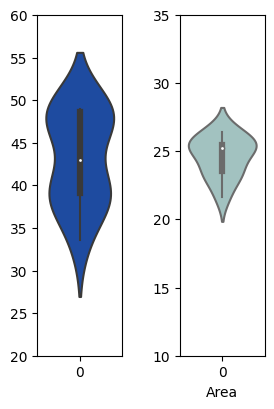

<Figure size 640x480 with 0 Axes>

In [3]:
#Figure 2 - Area-Perimeter
dd = pd.read_csv('./Full_density.csv')
area = [33.56,39.62,39.05,46.38,49,48.9,39.14,37.64,47.03,48.71,39.58,48.58]
perimeter = [21.64,25.42,23.38,25.23,25.69,25.3,23.57,22.85,26.4,26.43,24.22,25.29]
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(3,4))
fig.tight_layout()
sns.violinplot(area,bw=0.6,alpha=0.2,color=[0.0314,0.2706,0.7106,0],ax=ax1)
sns.violinplot(perimeter,bw=0.6,alpha=0.3,color=[138/225,176/225,174/225,1/225],ax=ax2)
plt.xlabel("Area")
ax2.set_ylim(10,35)
ax1.set_ylim(20,60)
#sns.swarmplot(nodesep,color='k',alpha=0.6)
plt.show()
plt.savefig('perimarea.png', bbox_inches='tight',dpi=1400)


In [4]:
#Figure 2 - Diameter

In [5]:
#Figure 2 - Curvature

[0.56778907 0.43856585 0.36331125 0.37239173 0.39911097 0.43391329
 0.39555312 0.40715345 0.38084613 0.38479399 0.38088923 0.36368447
 0.3795105  0.33831327 0.36920899 0.35839345 0.34347545 0.35537644
 0.36017126 0.33304914 0.34134382 0.35566986 0.31253668 0.34943495
 0.30855869 0.31143669 0.34346999 0.28748872 0.2772807  0.3391821 ]


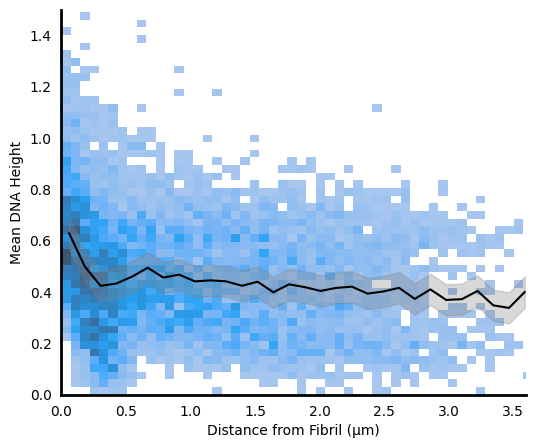

<Figure size 640x480 with 0 Axes>

In [6]:
#Figure 3 - Density-Distance
dd = pd.read_csv('./Full_density.csv')

dist = dd.Distance.to_numpy()
dens = dd.Density.to_numpy()
X,Y,mean_bin,std_bin=[],[],[],[]


for k,density in enumerate(dens):
    if 0 < density < 1.5 and np.isfinite(dist[k])==True:
        X = np.append(X,(dist[k]))
        Y = np.append(Y,(dens[k]))

mean = scis.binned_statistic(X,Y,statistic='mean',bins=30)
std = scis.binned_statistic(X,Y,statistic='std',bins=30)
m_bin = mean[1]
s_bin = std[1]

for i,bin in enumerate(std[1]):
    if i > 0:
        std_bin.append((bin + s_bin[i-1])/2)

for i,bin in enumerate(mean[1]):
    if i > 0:
        mean_bin.append((bin + m_bin[i-1])/2)

error_low = mean[0]-std_bin[0]
print(error_low)
error_high = mean[0]+std_bin[0]

fig, ax = plt.subplots(figsize=(6,5))
sns.histplot(x=X,y=Y,bins=50)
mean = plt.plot(mean_bin,mean[0],'k')
error = plt.fill_between(mean_bin,error_low,error_high,color='grey',alpha=0.3)
plt.setp(ax.spines.values(), linewidth=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(left = False, bottom = False) 
ax.set_ylim(0,1.5)
ax.set_xlim(0,3.6)
plt.xlabel("Distance from Fibril (μm)")
plt.ylabel("Mean DNA Height")
plt.show()

plt.savefig('Density-Distance.png', bbox_inches='tight',dpi=1400)

#Calculate median



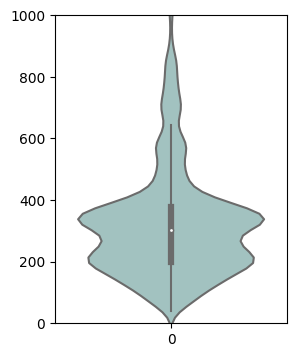

dip stat: 0.020231102723678927


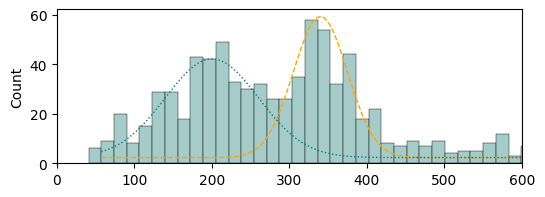

In [7]:
#Node Seperation

ns_pd = pd.read_csv('./Node_Sep_All.csv')

nodesep = ns_pd.Seperations.to_numpy()

fig, ax = plt.subplots(figsize=(3,4))
sns.violinplot(nodesep,bw=0.15,alpha=0.2,color=[138/225,176/225,174/225,1/225])
#sns.swarmplot(nodesep,color='k',alpha=0.6)
ax.set_ylim(0,1000)
plt.show()

#Histogram with double peak fitting
y,x=np.histogram(nodesep, 100)
x = np.delete(x,0)
x_fit = np.linspace(x.min(), x.max(), 500)
#y=y0 + (A/(w*sqrt(PI/2)))*exp(-2*((x-xc)/w)^2)
gauss1 = 2.3+(5000/(70*np.sqrt(np.pi*0.5)))*np.exp(-1*2*((x_fit-340)/70)**2)
gauss2 =2.3+(6000/(120*np.sqrt(np.pi*0.5)))*np.exp(-2*((x_fit-200)/120)**2)
#plot combined...
#plt.plot(x_fit, bimodal(x_fit, *params), color='red', lw=3, label='model')
#...and individual Gauss curves
fig1,ax1 = plt.subplots(figsize=(6,2))
plt.plot(x_fit, gauss1, color='orange', lw=1, ls="--", label='distribution 1')
plt.plot(x_fit, gauss2, color='teal', lw=1, ls=":", label='distribution 2')
#and the original data points if no histogram has been created before
sns.histplot(nodesep,bins=100,alpha=0.9,color=[138/225,176/225,174/225,1/225])
ax1.set_xlim(0,600)
plt.show
plt.savefig('Node_Sep_Hist.png', bbox_inches='tight',dpi=1400)

#Hartigans Dip Test
dip = diptest.dipstat(nodesep)
print("dip stat:",dip)


In [8]:
#Geometric 

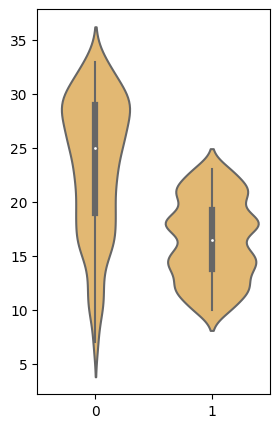

In [4]:
#Node Coordination (Pair with Area??!!)
nc = pd.read_csv('./Node_Coord_All.csv')
Fibril = nc.Fibril.to_numpy()
Cap = nc.Cap.to_numpy()

fig, ax = plt.subplots(figsize=(3,5))
sns.violinplot([Fibril,Cap],bw=0.25,alpha=0.2,color=([244/255,189/255,96/255,1/255]),dodge='auto')
#sns.violinplot(Cap,bw=0.15,alpha=0.2,color=[244/255,189/255,96/255,1/255],dodge='auto')
plt.savefig('Node-CoordB.png', bbox_inches='tight',dpi=1000)

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

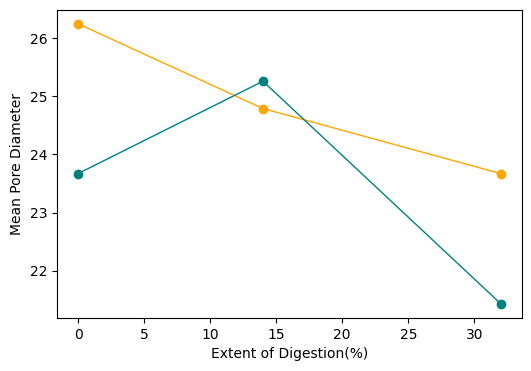

In [12]:
#Digestion Mean Pore Diameter

X = [0,14,32]
YC = [26.25,24.79,23.67]
YF = [23.67,25.26,21.43]

fig1,ax1 = plt.subplots(figsize=(6,4))
plt.plot(X, YC, color='orange', lw=1, marker='o', label='Cap')
plt.plot(X, YF, color='teal', lw=1, marker='o', label='Fibril')
plt.xlabel("Extent of Digestion(%)")
plt.ylabel("Mean Pore Diameter")
plt.show